In [28]:
# imports
import tensorflow as tf 
import numpy as np 
import pandas as pd 
from sklearn.datasets import load_wine
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder

import seaborn as sn
import matplotlib.pyplot as plt

print("TF version {}".format(tf.__version__))
print("numpy version {}".format(np.__version__))
print("pandas version {}".format(pd.__version__))
print("seaborn version {}".format(sn.__version__))

print("Eager mode: ", tf.executing_eagerly())
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

TF version 2.1.0
numpy version 1.18.1
pandas version 1.0.3
seaborn version 0.10.1
Eager mode:  True
GPU is NOT AVAILABLE


In [3]:
def get_train_test_validate(data_array, test_percent, validate_percent):
    index = len(data_array)
    print("the train max index is {}".format(index))

    # get the test/train split
    index = int(index * test_percent)
    train_data = data_array[:index]
    test_data = data_array[index:]
    print("the test split index is {}".format(index))

    # get the train/validate split
    index = int(index * validate_percent)
    validate_data = train_data[index:]
    train_data = train_data[:index]
    print("the validate split index is {}".format(index))

    # return
    return train_data, test_data, validate_data


In [31]:
# load the wine data
wine_df = load_wine()

print("the keys are {} and the df of type {}".format(wine_df.keys(), type(wine_df)))

the keys are dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names']) and the df of type <class 'sklearn.utils.Bunch'>


In [32]:
# get the features and labels
Xstart = wine_df.data
ystart = wine_df.target

print("the full features are of type {} and shape {}".format(type(Xstart), Xstart.shape))
print("the full labels are of type {} and shape {}".format(type(ystart), ystart.shape))



the full features are of type <class 'numpy.ndarray'> and shape (178, 13)
the full labels are of type <class 'numpy.ndarray'> and shape (178,)


In [33]:
# get new shuffled data
X, y = shuffle(Xstart, ystart, random_state = 3)

In [34]:
# print the first 20 elements
index = 10
print("the first {} of the data is {}".format(index, X[:index]))
print("the first {} of the targets is {}".format(index, y[:index]))

the first 10 of the data is [[13.560 1.710 2.310 16.200 117.000 3.150 3.290 0.340 2.340 6.130 0.950
  3.380 795.000]
 [13.770 1.900 2.680 17.100 115.000 3.000 2.790 0.390 1.680 6.300 1.130
  2.930 1375.000]
 [13.510 1.800 2.650 19.000 110.000 2.350 2.530 0.290 1.540 4.200 1.100
  2.870 1095.000]
 [11.610 1.350 2.700 20.000 94.000 2.740 2.920 0.290 2.490 2.650 0.960
  3.260 680.000]
 [13.480 1.670 2.640 22.500 89.000 2.600 1.100 0.520 2.290 11.750 0.570
  1.780 620.000]
 [12.850 1.600 2.520 17.800 95.000 2.480 2.370 0.260 1.460 3.930 1.090
  3.630 1015.000]
 [14.380 3.590 2.280 16.000 102.000 3.250 3.170 0.270 2.190 4.900 1.040
  3.440 1065.000]
 [13.490 1.660 2.240 24.000 87.000 1.880 1.840 0.270 1.030 3.740 0.980
  2.780 472.000]
 [12.330 0.990 1.950 14.800 136.000 1.900 1.850 0.350 2.760 3.400 1.060
  2.310 750.000]
 [13.070 1.500 2.100 15.500 98.000 2.400 2.640 0.280 1.370 3.700 1.180
  2.690 1020.000]]
the first 10 of the targets is [0 0 0 1 2 0 0 1 1 0]


In [35]:
index = 20
print("first {} targets are {}".format(index, y[:index]))

first 20 targets are [0 0 0 1 2 0 0 1 1 0 1 0 1 1 0 0 1 0 2 2]


In [36]:
# one hot the target
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
y_onehot = y.reshape(len(y), 1)

index = 20
print("encoded of shape {} is now {}".format(y_onehot.shape, y_onehot[:index]))

y_onehot = onehot_encoder.fit_transform(y_onehot)
print("first {} targets are {}".format(index, y_onehot[:index]))

encoded of shape (178, 1) is now [[0]
 [0]
 [0]
 [1]
 [2]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [2]
 [2]]
first 20 targets are [[1.000 0.000 0.000]
 [1.000 0.000 0.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]]


In [37]:
# get the train/test data
X_train, X_test, X_validate = get_train_test_validate(X, 0.8, 0.8)

print("the train dataset if of type {} and shape {}".format(type(X_train), X_train.shape))
print("the test dataset if of type {} and shape {}".format(type(X_test), X_test.shape))
print("the validate dataset if of type {} and shape {}".format(type(X_validate), X_validate.shape))

the train max index is 178
the test split index is 142
the validate split index is 113
the train dataset if of type <class 'numpy.ndarray'> and shape (113, 13)
the test dataset if of type <class 'numpy.ndarray'> and shape (36, 13)
the validate dataset if of type <class 'numpy.ndarray'> and shape (29, 13)


In [38]:
# split the labels into train/test/validate labels
y_train, y_test, y_validate = get_train_test_validate(y_onehot, 0.8, 0.8)

print("the train labels if of type {} and shape {}".format(type(y_train), y_train.shape))
print("the test labels if of type {} and shape {}".format(type(y_test), y_test.shape))
print("the validate labels if of type {} and shape {}".format(type(y_validate), y_validate.shape))

the train max index is 178
the test split index is 142
the validate split index is 113
the train labels if of type <class 'numpy.ndarray'> and shape (113, 3)
the test labels if of type <class 'numpy.ndarray'> and shape (36, 3)
the validate labels if of type <class 'numpy.ndarray'> and shape (29, 3)


In [39]:
# build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation= 'relu', input_shape=(13,)),
    # tf.keras.layers.AveragePooling1D(),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               1400      
_________________________________________________________________
dense_4 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 93        
Total params: 4,523
Trainable params: 4,523
Non-trainable params: 0
_________________________________________________________________


In [40]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# will only work if lables are one hot matrix?
# from keras.utils import to_categorical
# y_binary = to_categorical(y_int)
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# option from the TF classification example
# model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])



In [41]:
# fit the model
number_epochs=20

model.fit(X_train, y_train, epochs=number_epochs, batch_size=10, validation_data=(X_validate, y_validate), verbose=1)



Train on 113 samples, validate on 29 samples
Epoch 1/20
113/113 [==============================] - 0s 3ms/sample - loss: 39.5484 - accuracy: 0.3451 - val_loss: 9.3548 - val_accuracy: 0.2759
Epoch 2/20
113/113 [==============================] - 0s 158us/sample - loss: 11.0257 - accuracy: 0.2478 - val_loss: 10.2120 - val_accuracy: 0.2759
Epoch 3/20
113/113 [==============================] - 0s 171us/sample - loss: 4.8392 - accuracy: 0.2124 - val_loss: 2.0438 - val_accuracy: 0.4138
Epoch 4/20
113/113 [==============================] - 0s 167us/sample - loss: 2.3418 - accuracy: 0.4602 - val_loss: 0.8092 - val_accuracy: 0.7586
Epoch 5/20
113/113 [==============================] - 0s 167us/sample - loss: 0.6987 - accuracy: 0.6726 - val_loss: 0.7930 - val_accuracy: 0.5517
Epoch 6/20
113/113 [==============================] - 0s 168us/sample - loss: 0.7707 - accuracy: 0.6195 - val_loss: 0.6534 - val_accuracy: 0.7241
Epoch 7/20
113/113 [==============================] - 0s 180us/sample - loss: 

In [42]:
# predict
prediction = model.predict(X_test)

print("the prediction of type {} was {}".format(type(prediction), prediction))
print("the targets are {}".format(y_test[1:10]))

the prediction of type <class 'numpy.ndarray'> was [[0.000 0.999 0.001]
 [0.171 0.803 0.025]
 [0.987 0.013 0.000]
 [0.002 0.982 0.016]
 [0.002 0.961 0.037]
 [0.973 0.027 0.000]
 [0.996 0.004 0.000]
 [0.147 0.711 0.142]
 [0.003 0.381 0.616]
 [0.015 0.949 0.036]
 [0.009 0.961 0.029]
 [0.247 0.687 0.066]
 [0.004 0.995 0.001]
 [0.034 0.815 0.152]
 [0.081 0.608 0.311]
 [0.274 0.637 0.089]
 [0.993 0.007 0.000]
 [0.112 0.758 0.131]
 [0.000 0.988 0.012]
 [0.438 0.522 0.040]
 [0.998 0.002 0.000]
 [0.004 0.800 0.196]
 [0.000 0.998 0.001]
 [0.036 0.301 0.662]
 [0.010 0.342 0.647]
 [0.093 0.766 0.142]
 [0.002 0.848 0.150]
 [0.041 0.408 0.551]
 [0.003 0.588 0.408]
 [0.011 0.783 0.206]
 [0.034 0.239 0.726]
 [0.414 0.528 0.058]
 [0.924 0.075 0.001]
 [0.006 0.882 0.112]
 [0.000 0.997 0.003]
 [0.054 0.751 0.195]]
the targets are [[1.000 0.000 0.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.000 0.000 1.000]
 [0.000 

In [43]:
# format the results
float_formatter = "{:.3f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

print("the prediction of type {} was {}".format(type(prediction), prediction))
print("the targets are {}".format(y_test[1:10]))

the prediction of type <class 'numpy.ndarray'> was [[0.000 0.999 0.001]
 [0.171 0.803 0.025]
 [0.987 0.013 0.000]
 [0.002 0.982 0.016]
 [0.002 0.961 0.037]
 [0.973 0.027 0.000]
 [0.996 0.004 0.000]
 [0.147 0.711 0.142]
 [0.003 0.381 0.616]
 [0.015 0.949 0.036]
 [0.009 0.961 0.029]
 [0.247 0.687 0.066]
 [0.004 0.995 0.001]
 [0.034 0.815 0.152]
 [0.081 0.608 0.311]
 [0.274 0.637 0.089]
 [0.993 0.007 0.000]
 [0.112 0.758 0.131]
 [0.000 0.988 0.012]
 [0.438 0.522 0.040]
 [0.998 0.002 0.000]
 [0.004 0.800 0.196]
 [0.000 0.998 0.001]
 [0.036 0.301 0.662]
 [0.010 0.342 0.647]
 [0.093 0.766 0.142]
 [0.002 0.848 0.150]
 [0.041 0.408 0.551]
 [0.003 0.588 0.408]
 [0.011 0.783 0.206]
 [0.034 0.239 0.726]
 [0.414 0.528 0.058]
 [0.924 0.075 0.001]
 [0.006 0.882 0.112]
 [0.000 0.997 0.003]
 [0.054 0.751 0.195]]
the targets are [[1.000 0.000 0.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.000 0.000 1.000]
 [0.000 

In [45]:
# now create the confusion matrix
con_labels = np.argmax(y_test, axis=1)
con_labels = con_labels.tolist()
con_predict = np.argmax(prediction, axis=1)
con_predict = con_predict.tolist()

index = 20
print("the first {} elements of the label list is {}".format(index, con_labels[:index]))
print("the first {} elements of the prediction list is {}".format(index, con_predict[:index]))


the first 20 elements of the label list is [1, 0, 0, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1]
the first 20 elements of the prediction list is [1, 1, 0, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]


In [46]:
# build the confusion matrix
cm = confusion_matrix(con_labels, con_predict)

print(cm)

[[ 6  2  0]
 [ 0 17  0]
 [ 0  6  5]]


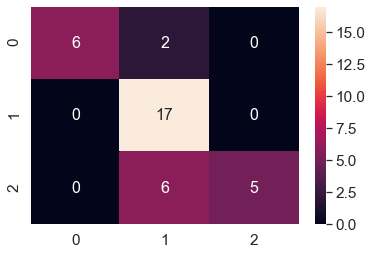

In [47]:
# display the confusion matrix
df_cm = pd.DataFrame(cm, range(3), range(3))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()


In [48]:
# describe the features
features_df = pd.DataFrame(X)
features_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [49]:
# now normalize the data
from sklearn.preprocessing import Normalizer, MinMaxScaler

normalizer = MinMaxScaler()

index = 10
print("the non normalized first {} rows of data are \n{}".format(index, X[:index]))

X_normalized = normalizer.fit_transform(X)
print("the new normalized first {} rows of data are \n{}".format(index, X_normalized[:index]))



the non normalized first 10 rows of data are 
[[13.560 1.710 2.310 16.200 117.000 3.150 3.290 0.340 2.340 6.130 0.950
  3.380 795.000]
 [13.770 1.900 2.680 17.100 115.000 3.000 2.790 0.390 1.680 6.300 1.130
  2.930 1375.000]
 [13.510 1.800 2.650 19.000 110.000 2.350 2.530 0.290 1.540 4.200 1.100
  2.870 1095.000]
 [11.610 1.350 2.700 20.000 94.000 2.740 2.920 0.290 2.490 2.650 0.960
  3.260 680.000]
 [13.480 1.670 2.640 22.500 89.000 2.600 1.100 0.520 2.290 11.750 0.570
  1.780 620.000]
 [12.850 1.600 2.520 17.800 95.000 2.480 2.370 0.260 1.460 3.930 1.090
  3.630 1015.000]
 [14.380 3.590 2.280 16.000 102.000 3.250 3.170 0.270 2.190 4.900 1.040
  3.440 1065.000]
 [13.490 1.660 2.240 24.000 87.000 1.880 1.840 0.270 1.030 3.740 0.980
  2.780 472.000]
 [12.330 0.990 1.950 14.800 136.000 1.900 1.850 0.350 2.760 3.400 1.060
  2.310 750.000]
 [13.070 1.500 2.100 15.500 98.000 2.400 2.640 0.280 1.370 3.700 1.180
  2.690 1020.000]]
the new normalized first 10 rows of data are 
[[0.666 0.192 0.

In [50]:
# get the train/test data
X_train, X_test, X_validate = get_train_test_validate(X_normalized, 0.8, 0.8)

# now fit the model on the new normalized data
number_epochs=20

model.fit(X_train, y_train, epochs=number_epochs, batch_size=10, validation_data=(X_validate, y_validate), verbose=1)


the train max index is 178
the test split index is 142
the validate split index is 113
Train on 113 samples, validate on 29 samples
Epoch 1/20
113/113 [==============================] - 0s 183us/sample - loss: 1.0322 - accuracy: 0.5929 - val_loss: 0.9277 - val_accuracy: 0.9310
Epoch 2/20
113/113 [==============================] - 0s 148us/sample - loss: 0.8672 - accuracy: 0.8850 - val_loss: 0.7406 - val_accuracy: 0.9655
Epoch 3/20
113/113 [==============================] - 0s 152us/sample - loss: 0.6815 - accuracy: 0.8761 - val_loss: 0.6279 - val_accuracy: 0.8276
Epoch 4/20
113/113 [==============================] - 0s 153us/sample - loss: 0.5384 - accuracy: 0.8761 - val_loss: 0.4620 - val_accuracy: 0.9310
Epoch 5/20
113/113 [==============================] - 0s 150us/sample - loss: 0.4362 - accuracy: 0.9292 - val_loss: 0.3574 - val_accuracy: 0.9655
Epoch 6/20
113/113 [==============================] - 0s 163us/sample - loss: 0.3551 - accuracy: 0.9204 - val_loss: 0.3074 - val_accuracy:

In [51]:
# predict
prediction = model.predict(X_test)

print("the prediction of type {} was {}".format(type(prediction), prediction))
print("the targets are {}".format(y_test[1:10]))

the prediction of type <class 'numpy.ndarray'> was [[0.085 0.911 0.004]
 [0.976 0.024 0.001]
 [0.919 0.075 0.006]
 [0.033 0.963 0.004]
 [0.315 0.617 0.068]
 [0.942 0.055 0.003]
 [0.996 0.003 0.001]
 [0.297 0.672 0.030]
 [0.000 0.002 0.997]
 [0.063 0.934 0.003]
 [0.099 0.896 0.005]
 [0.136 0.859 0.005]
 [0.140 0.854 0.005]
 [0.005 0.986 0.009]
 [0.042 0.840 0.118]
 [0.010 0.940 0.050]
 [0.969 0.030 0.001]
 [0.436 0.561 0.003]
 [0.007 0.009 0.984]
 [0.376 0.619 0.005]
 [0.990 0.009 0.001]
 [0.005 0.127 0.868]
 [0.054 0.944 0.002]
 [0.002 0.008 0.990]
 [0.002 0.004 0.994]
 [0.046 0.947 0.008]
 [0.003 0.006 0.991]
 [0.003 0.046 0.952]
 [0.007 0.006 0.988]
 [0.008 0.956 0.035]
 [0.001 0.006 0.993]
 [0.898 0.096 0.006]
 [0.995 0.005 0.000]
 [0.024 0.051 0.925]
 [0.006 0.050 0.943]
 [0.036 0.959 0.006]]
the targets are [[1.000 0.000 0.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.000 0.000 1.000]
 [0.000 

In [52]:
# now create the confi=usion matrix
con_labels = np.argmax(y_test, axis=1)
con_labels = con_labels.tolist()
con_predict = np.argmax(prediction, axis=1)
con_predict = con_predict.tolist()

index = 20
print("the first {} elements of the label list is {}".format(index, con_labels[:index]))
print("the first {} elements of the prediction list is {}".format(index, con_predict[:index]))


the first 20 elements of the label list is [1, 0, 0, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1]
the first 20 elements of the prediction list is [1, 0, 0, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1]


In [53]:
# build the confusion matrix
cm = confusion_matrix(con_labels, con_predict)

print(cm)


[[ 8  0  0]
 [ 0 17  0]
 [ 0  0 11]]


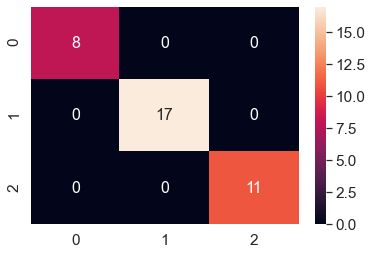

In [54]:
# display the confusion matrix
df_cm = pd.DataFrame(cm, range(3), range(3))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()
